In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from IPython.display import Image
%matplotlib inline

In [ ]:
#csv files

In [2]:
regSeasonMVP = pd.read_csv('MVP.csv')
ROY = pd.read_csv('ROY.csv')

In [3]:
#csv of all MVP winners and their stats for that year
#dimensions: 65 rows × 18 columns
regSeasonMVP.head()

,Season,Lg,Player,Voting,Age,Tm,G,MP,PTS,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48
0,2019-20,NBA,Giannis Antetokounmpo\antetgi01,(V),25,MIL,63,30.4,29.5,13.6,5.6,1.0,1.0,0.553,0.304,0.633,11.1,0.279
1,2018-19,NBA,Giannis Antetokounmpo\antetgi01,(V),24,MIL,72,32.8,27.7,12.5,5.9,1.3,1.5,0.578,0.256,0.729,14.4,0.292
2,2017-18,NBA,James Harden\hardeja01,(V),28,HOU,72,35.4,30.4,5.4,8.8,1.8,0.7,0.449,0.367,0.858,15.4,0.289
3,2016-17,NBA,Russell Westbrook\westbru01,(V),28,OKC,81,34.6,31.6,10.7,10.4,1.6,0.4,0.425,0.343,0.845,13.1,0.224
4,2015-16,NBA,Stephen Curry\curryst01,(V),27,GSW,79,34.2,30.1,5.4,6.7,2.1,0.2,0.504,0.454,0.908,17.9,0.318


In [4]:
#csv of all the rookie of the year winners 
#dimensions: 77 rows × 18 columns
ROY.head()

,Season,Lg,Player,Voting,Age,Tm,G,MP,PTS,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48
0,2019-20,NBA,Ja Morant\moranja01,(V),20,MEM,67,31.0,17.8,3.9,7.3,0.9,0.3,0.477,0.335,0.776,3.8,0.088
1,2018-19,NBA,Luka Dončić\doncilu01,(V),19,DAL,72,32.2,21.2,7.8,6.0,1.1,0.3,0.427,0.327,0.713,4.9,0.101
2,2017-18,NBA,Ben Simmons\simmobe01,(V),21,PHI,81,33.7,15.8,8.1,8.2,1.7,0.9,0.545,0.000,0.560,9.2,0.162
3,2016-17,NBA,Malcolm Brogdon\brogdma01,(V),24,MIL,75,26.4,10.2,2.8,4.2,1.1,0.2,0.457,0.404,0.865,4.1,0.100
4,2015-16,NBA,Karl-Anthony Towns\townska01,(V),20,MIN,82,32.0,18.3,10.5,2.0,0.7,1.7,0.542,0.341,0.811,8.3,0.151


In [25]:
#getting the average of all  declared columns in my project plan..
#pts,reb,ast,stl,blk, fg%, 3p%, and ft%, plus the min and max for each.

#.loc will locate all the specified columns and all rows and then average/.mean(),.min(),.max() the columns.

allMVPAverages = regSeasonMVP.loc[::, ['PTS','TRB','AST','STL','BLK','FG%','3P%','FT%']].mean() 
allMVPmin = regSeasonMVP.loc[::, ['PTS','TRB','AST','STL','BLK','FG%','3P%','FT%']].min()
allMVPmax = regSeasonMVP.loc[::, ['PTS','TRB','AST','STL','BLK','FG%','3P%','FT%']].max()

In [29]:
#for our box plot of better visualizing the data above
stats_df = regSeasonMVP.drop(['Season', 'Lg', 'Voting','Age','Tm','G','MP','WS','WS/48'], axis=1)


In [26]:
allMVPAverages

PTS    26.064615
TRB    12.209231
AST     5.560000
STL     1.527660
BLK     1.376596
FG%     0.505692
3P%     0.281902
FT%     0.753462
dtype: float64

In [7]:
allMVPmin

PTS    13.800
TRB     3.300
AST     1.300
STL     0.500
BLK     0.100
FG%     0.378
3P%     0.000
FT%     0.380
dtype: float64

In [8]:
allMVPmax

PTS    37.600
TRB    27.000
AST    12.800
STL     3.200
BLK     4.100
FG%     0.683
3P%     0.454
FT%     0.921
dtype: float64

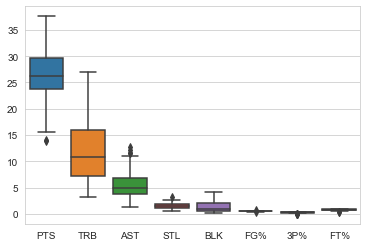

In [35]:
#visualized data
#boxplot

sb.boxplot(data=stats_df)


In [9]:
#how many players who were awarded the Rookie of the year (ROY) and were awarded as the regular season MVP 
def isROYanMVP(column1,column2):
    
    #open dictionary for matching players and the number of MVP's they have
    numOfDuplicates = {}
    
    
    #loop through each datafram
    for col in column1['Player']:
        for col2 in column2['Player']:
            
            #if there are index matches
            if col2 in col:
                
                #if the player name is not in the dictionary then add it as a key and then the value is equal to
                #the number of MVP's they have won
                if col not in numOfDuplicates:
                    numOfDuplicates[col] = 1
                else:
                    numOfDuplicates[col] +=1
                    
    return numOfDuplicates
 
    
    
newDict =isROYanMVP(ROY,regSeasonMVP)
#now lets get a better understanding for how many people have won 1+ MVP out of our mathcing dictionary

counter = 0 
for num in newDict.values():
    if num >=2:
        counter+=1

oneTime = (len(newDict)-counter)

print('There are '+str(counter)+' players with more than one MVP award and ROY and '+str(oneTime)+' players who one just one of each award')
newDict

There are 7 players with more than one MVP award and ROY and 9 players who one just one of each award


{'Derrick Rose\\rosede01': 1,
 'Kevin Durant\\duranke01': 1,
 'LeBron James\\jamesle01': 4,
 'Tim Duncan\\duncati01': 2,
 'Allen Iverson\\iversal01': 1,
 "Shaquille O'Neal\\onealsh01": 1,
 'David Robinson\\robinda01': 1,
 'Michael Jordan\\jordami01': 5,
 'Larry Bird\\birdla01': 3,
 'Bob McAdoo\\mcadobo01': 1,
 'Kareem Abdul-Jabbar\\abdulka01': 6,
 'Wes Unseld\\unselwe01': 1,
 'Willis Reed\\reedwi01': 1,
 'Oscar Robertson\\roberos01': 1,
 'Wilt Chamberlain\\chambwi01': 4,
 'Bob Pettit\\pettibo01': 2}

<BarContainer object of 16 artists>

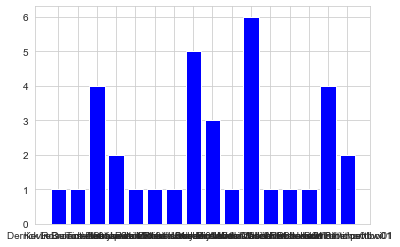

In [40]:
plt.bar(newDict.keys(), newDict.values(), color='b')

In [55]:
def getStatsInput(firstName, lastName, year, uniqueID):
    import requests
    statList = []
    name = requests.get("https://www.balldontlie.io/api/v1/players?search="+str(uniqueID)).json()
    
    for i in name['data']:
        if i['last_name'] == str(lastName) and i['first_name'] == str(firstName):
            idNum = i['id']
            playerAVG = requests.get('https://www.balldontlie.io/api/v1/season_averages?season='+str(year)+'&player_ids[]='+str(idNum)).json()
            for stats in playerAVG['data']:
                statList.extend((stats['pts'],stats['reb'],stats['ast'], stats['stl'],stats['blk'],
                stats['fg_pct'], stats['fg3_pct'], stats['ft_pct']))
                
                #print(i['last_name']+', '+i['first_name'])
                return  uniqueID, statList
                

In [56]:
#unique name identifier EX: to get LeBron James user must input LeBron instead of James because less people have the name Lebron than James
#(looks for matches in the first or last name for the unique name identifier)      

        #first name, last name, season, unique name identifier
playerInput = getStatsInput('LeBron','James','2016','LeBron')

In [57]:
#full list of stat categories identicle to the csv files
#pts,reb,ast,stl,blk, fg%, 3p%, and ft%

playerInput

('LeBron', [26.41, 8.64, 8.73, 1.24, 0.59, 0.548, 0.363, 0.674])

In [58]:
#you can access just the statistics by...

playerInput[1]
#its the third list index, a list within another list

[26.41, 8.64, 8.73, 1.24, 0.59, 0.548, 0.363, 0.674]

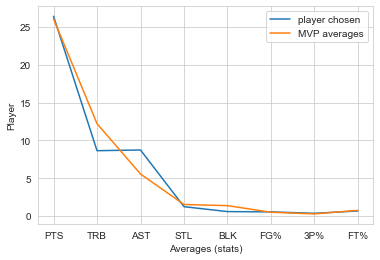

In [66]:
#now lets visualize all our data
#specifically how does your chosen player compare to mvp statistical averages

plt.plot(playerInput[1], label='player chosen')
plt.plot(allMVPAverages, label='MVP averages')
plt.xlabel("Averages (stats)")
plt.ylabel("Player")
plt.legend()
plt.show()
#plt.bar(playerInput[2],)